# amorphousのデータ数に対するsputtering yieldの変化を見る

In [13]:
from glob import glob
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from mlptools.analyzer.sputtering_yield import SputteringYieldCalculator

In [14]:
path2target = "/Users/y1u0d2/desktop/Lab/result/lammps/Si/sputtering/ml/sp_analysis_with_number_of_amorphous_data/0deg_750eV"
amorphous_result = glob(f"{path2target}/amo*")

# sort amorphous_result by the number of amo_*
amorphous_result = sorted(amorphous_result, key=lambda x: int(x.split("_")[-1]))

/Users/y1u0d2/desktop/Lab/result/lammps/Si/sputtering/ml/sp_analysis_with_number_of_amorphous_data/0deg_750eV/amo_2486
Number of total timestep: 30000000
Inject atom every 20000 timestep
Number of injected atoms: 1500
Label: amo_2486, average: 0.25258857564520043
/Users/y1u0d2/desktop/Lab/result/lammps/Si/sputtering/ml/sp_analysis_with_number_of_amorphous_data/0deg_750eV/amo_12308
Number of total timestep: 30000000
Inject atom every 20000 timestep
Number of injected atoms: 1500
Label: amo_12308, average: 0.23890626464773335


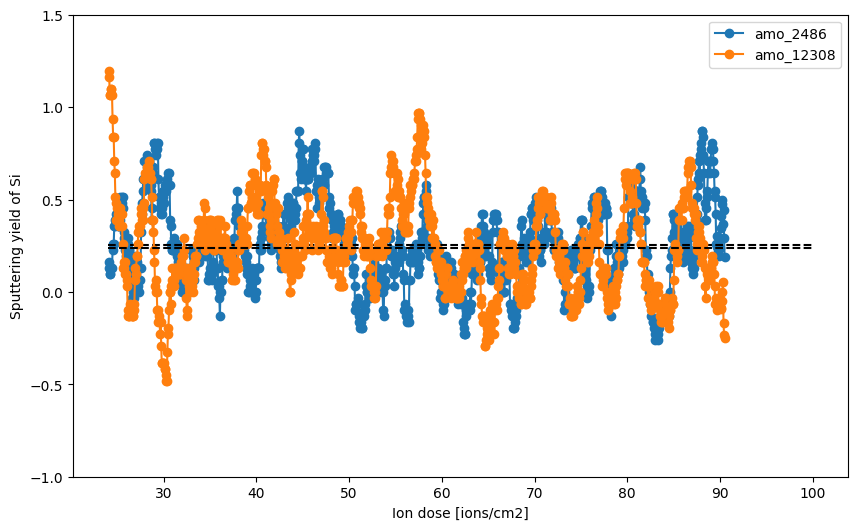

In [15]:
fig, ax = plt.subplots(figsize=(10, 6))
ion_dose_range = (24, 100)

for dir in amorphous_result:
    print(dir)
    label = os.path.basename(dir)
    calculator = SputteringYieldCalculator(path2target=dir, inject_atom_every_timestep=20000)
    sp_with_ion_dose_df = calculator.get_sputtering_yield_with_ion_dose(
        area=4.0725**2,
        num_injection=15,
        target_atom_type=[1]
    )
    sp_with_ion_dose_df = sp_with_ion_dose_df[(sp_with_ion_dose_df["ion_dose"] >= ion_dose_range[0]) & (sp_with_ion_dose_df["ion_dose"] <= ion_dose_range[1])].copy()
    average_sp = sp_with_ion_dose_df["num_sputtered_atom_avg"].mean() -1
    print(f"Label: {label}, average: {average_sp}")

    ax.plot(sp_with_ion_dose_df["ion_dose"], sp_with_ion_dose_df["num_sputtered_atom_avg"]-1, marker="o", label=label)
    # plot average line
    ax.plot([ion_dose_range[0], ion_dose_range[1]], [average_sp, average_sp], linestyle="--", color="black")

ax.set_xlabel("Ion dose [ions/cm2]")
ax.set_ylabel("Sputtering yield of Si")
ax.set_ylim(-1, 1.5)
ax.legend()